In [2]:
%pip install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.3 MB/s eta 0:01:56
   ---------------------------------------- 0.4/150.0 MB 3.4 MB/s eta 0:00:44
   ---------------------------------------- 0.7/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.0/150.0 MB 4.9 MB/s eta 0:00:31
   ---------------------------------------- 1.2/150.0 MB 4.8 MB/s eta 0:00:32
   ---------------------------------------- 1.4/150.0 MB 4.7 MB/s eta 0:00:32
   ---------------------------------------- 1.6/150.0 MB 4.5 MB/s eta 0:00:34
   --------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data=pd.read_csv(r"C:\Users\akhil\Downloads\traffic volume.csv")

In [5]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [6]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [8]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [9]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

C:\Users\akhil\AppData\Local\Temp\ipykernel_13140\3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\akhil\AppData\Local\Temp\ipykernel_13140\3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [10]:
from collections import Counter
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [11]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\akhil\AppData\Local\Temp\ipykernel_13140\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [12]:
corr = data.select_dtypes(include=np.number).corr()

<Axes: >

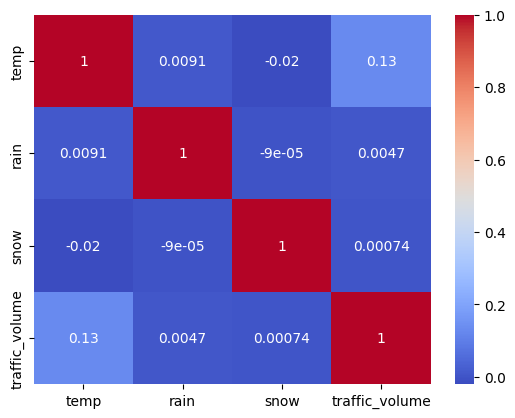

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

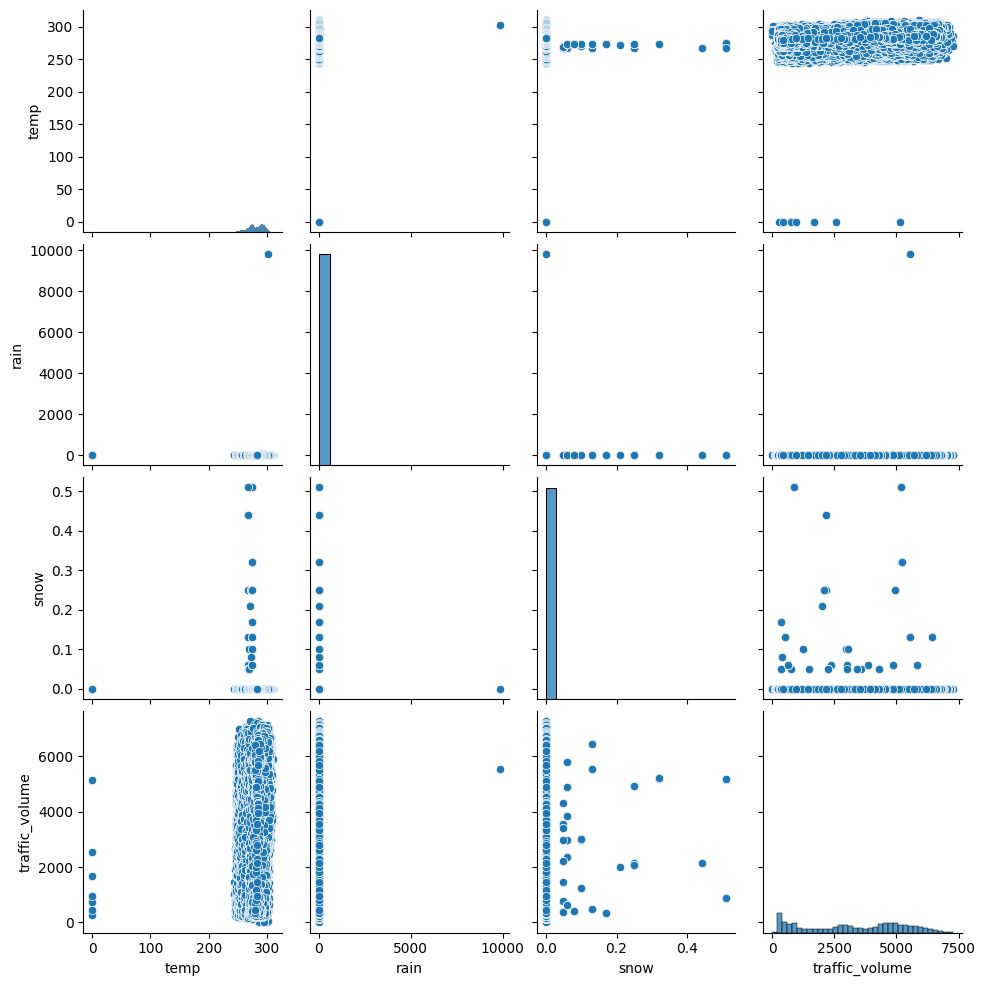

In [14]:
sns.pairplot(data)

<Axes: >

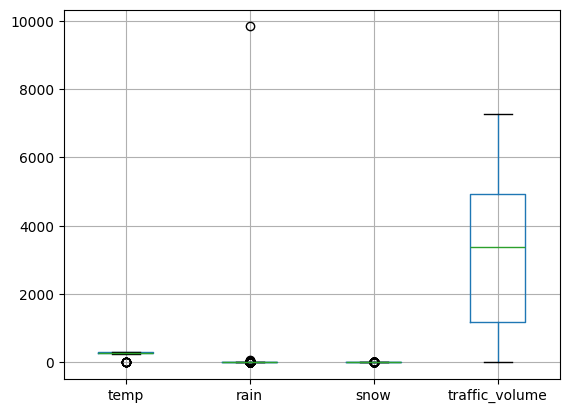

In [15]:
data.boxplot()

In [16]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [17]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [18]:
data.drop(columns=["date","Time"],axis=1,inplace=True)

In [19]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [20]:
y = data['traffic_volume']

x = data.drop(columns=['traffic_volume'],axis=1)

In [22]:
from sklearn.preprocessing import scale

y = data["traffic_volume"]
x = data.drop(columns=["traffic_volume"], axis=1)


numeric_cols_to_scale = x.select_dtypes(include=np.number).columns.tolist()

x_to_scale = x[numeric_cols_to_scale]

x_scaled_data = scale(x_to_scale)

x_scaled = pd.DataFrame(x_scaled_data, columns=numeric_cols_to_scale)

display(x_scaled.head())

,temp,rain,snow
0,0.530485,-0.007463,-0.027235
1,0.611467,-0.007463,-0.027235
2,0.627964,-0.007463,-0.027235
3,0.669205,-0.007463,-0.027235
4,0.744939,-0.007463,-0.027235


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
%pip install xgboost
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['holiday'] = le.fit_transform(x_train['holiday'])
x_test['holiday'] = le.transform(x_test['holiday'])


In [39]:
print(x_train.select_dtypes(include='object').columns)


Index(['weather', 'day', 'month', 'year', 'hours', 'minutes', 'seconds'], dtype='object')


In [42]:
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        print(f"{col}: {x_train[col].unique()[:5]}")


weather: ['Clear' 'Rain' 'Mist' 'Clouds' 'Snow']
day: ['28' '14' '12' '30' '09']
month: ['07' '02' '11' '04' '06']
year: ['2017' '2016' '2015' '2014' '2013']
hours: ['23' '10' '12' '01' '21']
minutes: ['00']
seconds: ['00']


In [43]:
print(x_train.dtypes)


holiday      int64
temp       float64
rain       float64
snow       float64
weather     object
day         object
month       object
year        object
hours       object
minutes     object
seconds     object
dtype: object


In [44]:
import pandas as pd

# Combine for consistent encoding
combined = pd.concat([x_train, x_test], axis=0)

# Encode only object columns
combined = pd.get_dummies(combined)

# Split back
x_train_encoded = combined.iloc[:len(x_train), :].copy()
x_test_encoded = combined.iloc[len(x_train):, :].copy()


In [45]:
import pandas as pd

# Combine train and test to encode consistently
combined = pd.concat([x_train, x_test], axis=0)

# Encode all object (string) columns
combined_encoded = pd.get_dummies(combined)

# Split back
x_train_encoded = combined_encoded.iloc[:len(x_train)]
x_test_encoded = combined_encoded.iloc[len(x_train):]


In [49]:
lin_reg.fit(x_train_encoded, y_train)
Dtree.fit(x_train_encoded, y_train)
Rand.fit(x_train_encoded, y_train)
svr.fit(x_train_encoded, y_train)
XGB.fit(x_train_encoded, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
p1=lin_reg.predict(x_train_encoded)
p2=Dtree.predict(x_train_encoded)
p3=Rand.predict(x_train_encoded)
p4=svr.predict(x_train_encoded)
p5=XGB.predict(x_train_encoded)

In [54]:
from sklearn import metrics

In [55]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

0.717060433343855
1.0
0.9736881199379201
-12554.258751296364
0.8233413100242615


In [57]:
p2=Dtree.predict(x_test_encoded)
p3=Rand.predict(x_test_encoded)
p4=svr.predict(x_test_encoded)
p5=XGB.predict(x_test_encoded)

In [58]:
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

0.688649251761694
0.7954304434974522
-12664.125461069032
0.7844209671020508


In [59]:
MSE=metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

np.float64(824.2862958325994)

In [61]:
import pickle

pickle.dump(Rand, open('model.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))
# Removed the line attempting to dump 'le' as it was not defined

In [67]:
model = pickle.load(open(r'C:\Users\akhil\OneDrive\Desktop\aiml1\model.pkl', 'rb'))


In [68]:
with open(r'C:\Users\akhil\OneDrive\Desktop\aiml1\model.pkl', 'rb') as f:
    model = pickle.load(f)



In [ ]:
scale = pickle.load(open(r'C:\Users\akhil\OneDrive\Desktop\aiml1\label_encoder.pkl', 'rb'))
with open(r'"C:\Users\akhil\OneDrive\Desktop\aiml1\label_encoder.pkl"', 'rb') as f:
    scale = pickle.load(f)